<a href="https://colab.research.google.com/github/bridgetmensah/Getting_started_w_pyTorch/blob/main/getting_started_with_pytorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [29]:
import torch
from torch import nn # nn contains all pytorch building block for neural network
import matplotlib.pyplot as plt

#checking pytorch version
torch.__version__


'2.6.0+cu124'

In [30]:
#Getting started with data (preparing and loading)
#known parameters
weight = 0.7
bias = 0.3
 # creating our data
start = 0
end  = 1
step = 0.02
X= torch.arange(start,end,step).unsqueeze(dim=1) # unsqueeze adds extra dimentions
y = weight * X + bias

X[: 10], y[: 10]


(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

In [31]:
#splitting data into training and test set
train_split = int(0.8 * len(X)) # takes 80% of the data we created
X_train, y_train = X[: train_split], y[: train_split] #get everything upto the train split
X_test, y_test = X[train_split :], y[train_split :] # get everything after the trainsplit

len(X_train), len(y_train), len(X_test), len(y_test)

(40, 40, 10, 10)

In [32]:
#creating a model for liner regression using the data we created
class LinearRegressionModel(nn.Module): # almost everything in pytorch inherits from nn.Module
    def __init__(self): # this is a constructor (read documentation from real python)
        super().__init__()
        self.weight = nn.Parameter(torch.randn(1, requires_grad=True, dtype=torch.float))
        self.bias = nn.Parameter(torch.randn(1, requires_grad=True, dtype=torch.float))

        #forward method to define the computation in the model
    def forward(self, X: torch.Tensor) -> torch.Tensor: # x is the input data
        return self.weight * X + self.bias # this is the linear regression formula

In [33]:
# creating an instancewith our model
torch.manual_seed(42)
model_0 = LinearRegressionModel()
list(model_0.parameters()) # a parameter is a value the model set itself
model_0.state_dict()

OrderedDict([('weight', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [34]:
# make predictions with our model
with torch.inference_mode():
    y_preds = model_0(X_test)
y_preds

''' we can alos use torch.no_grad as well'''

' we can alos use torch.no_grad as well'

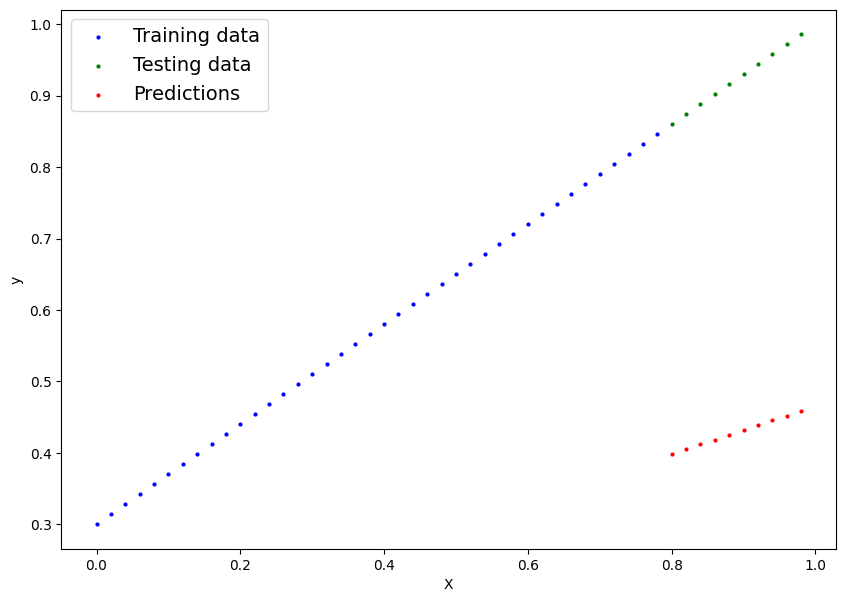

'we realize that our predictions are not good'

In [49]:
#let's visulaize this to see if our predictions is right
def plot_predictions(train_data=X_train,
                     train_labels=y_train,
                     test_data=X_test,
                     test_labels=y_test,
                     predictions=None):
  plt.figure(figsize=(10, 7))
  plt.scatter(train_data, train_labels, c="b", s=4, label="Training data")
  plt.scatter(test_data, test_labels, c="g", s=4, label="Testing data")
  if predictions is not None:
    plt.scatter(test_data, predictions, c="r", s=4, label="Predictions")
  plt.legend(prop={"size": 14})
  plt.xlabel("X")
  plt.ylabel("y")
  plt.show()

plot_predictions(predictions= y_preds)

'''we realize that our predictions are not good'''

In [36]:
# let's measure how wrong our model prediction is using loss functions and an optimizer(adjust model paramters)
'''note: lower is always better '''
loss_fn = nn.L1Loss() # mean absolute error

# set up an optmizer using SGD (stochastic graidient descent)
optimizer = torch.optim.SGD(params=model_0.parameters(), lr=0.01) #lr is just the learning rate
#optimizer

In [76]:
#building a training and testing loop
torch.manual_seed(42)
epochs = 100 # an epoch is one loop through the data
for epoch in range(epochs):
    model_0.train()
    #forward pass
    y_pred = model_0(X_train)
    #calculating the loss
    loss = loss_fn(y_pred, y_train)
    print(f"Loss: {loss}")
    #optimize sero grad
    optimizer.zero_grad()
    #loss backward
    loss.backward()
    #optimizer step
    optimizer.step()

##Testing loop
    model_0.eval() #turns off different setting not needing fro testing
    with torch.inference_mode():
  #the forward pass
      test_preds = model_0(X_test)
  #calculate the loss
      test_loss = loss_fn(test_preds, y_test)

    if epoch % 10 == 0:
      print(f"Epoch: {epoch} |Loss: {loss} | MAE: {test_loss}")
      print(model_0.state_dict())

#print(model_0.state_dict()) ##this helps us to see the predicted parameters so we can compare with what we initailized


Loss: 0.0025885067880153656
Epoch: 0 |Loss: 0.0025885067880153656 | MAE: 0.008447891101241112
OrderedDict([('weight', tensor([0.6990])), ('bias', tensor([0.3093]))])
Loss: 0.008932482451200485
Loss: 0.0025885067880153656
Loss: 0.008932482451200485
Loss: 0.0025885067880153656
Loss: 0.008932482451200485
Loss: 0.0025885067880153656
Loss: 0.008932482451200485
Loss: 0.0025885067880153656
Loss: 0.008932482451200485
Loss: 0.0025885067880153656
Epoch: 10 |Loss: 0.0025885067880153656 | MAE: 0.008447891101241112
OrderedDict([('weight', tensor([0.6990])), ('bias', tensor([0.3093]))])
Loss: 0.008932482451200485
Loss: 0.0025885067880153656
Loss: 0.008932482451200485
Loss: 0.0025885067880153656
Loss: 0.008932482451200485
Loss: 0.0025885067880153656
Loss: 0.008932482451200485
Loss: 0.0025885067880153656
Loss: 0.008932482451200485
Loss: 0.0025885067880153656
Epoch: 20 |Loss: 0.0025885067880153656 | MAE: 0.008447891101241112
OrderedDict([('weight', tensor([0.6990])), ('bias', tensor([0.3093]))])
Loss: 

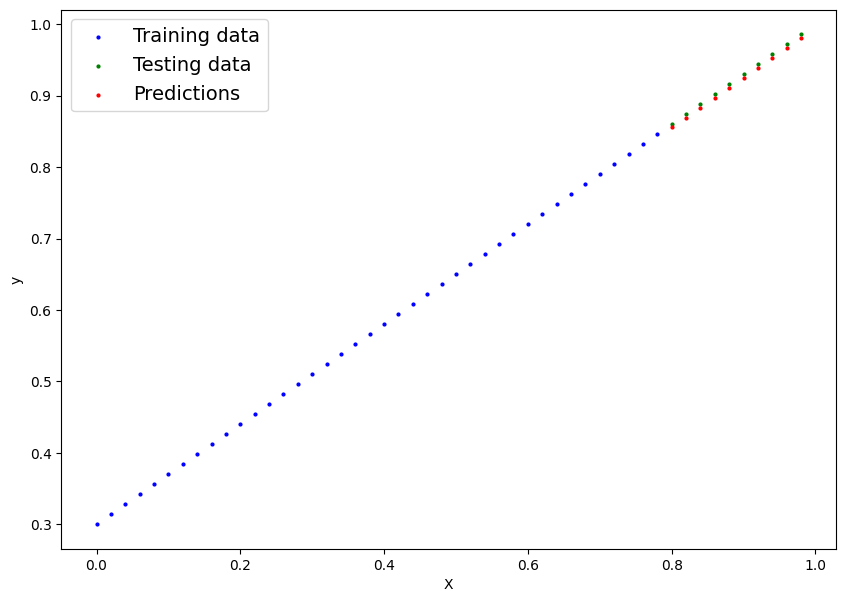

In [77]:
#seeing what our model does now visually
with torch.inference_mode():
    y_preds_new = model_0(X_test)
plot_predictions(predictions=y_preds_new)

In [70]:
## Saving a model in pyTorch
